<a href="https://colab.research.google.com/github/bhogasena/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Linear Regression - Ridge and Lasso**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

*   Which variables are significant in predicting the price of a house, and
*   How well those variables describe the price of a house.


## Step 1: Reading and Understanding the Data

In [1098]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import stats
import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.display.max_rows =100
pd.options.display.max_columns=None

In [1099]:
house_df = pd.read_csv("train.csv")

In [1100]:
house_df.shape

(1460, 81)

In [1101]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1102]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1103]:
#update data type as catergory for categorical columns though these are numerical currently
categorical_cols=['OverallCond','MSSubClass','OverallQual']
house_df[categorical_cols] = house_df[categorical_cols].astype('category')


In [1104]:
# Get Numerical and Categorical features
numerical_cols=[]
categorical_cols=[]

def getNumericAndCategorical():
  numerical_cols = list(house_df.select_dtypes(include=['int64','float64']).columns)
  categorical_cols = list(house_df.select_dtypes(include=['category','object']).columns)
  return (numerical_cols, categorical_cols)
numerical_cols,categorical_cols = getNumericAndCategorical()

## Step 2: Visualising the Data

### Quantitative Variables Univariate Analysis

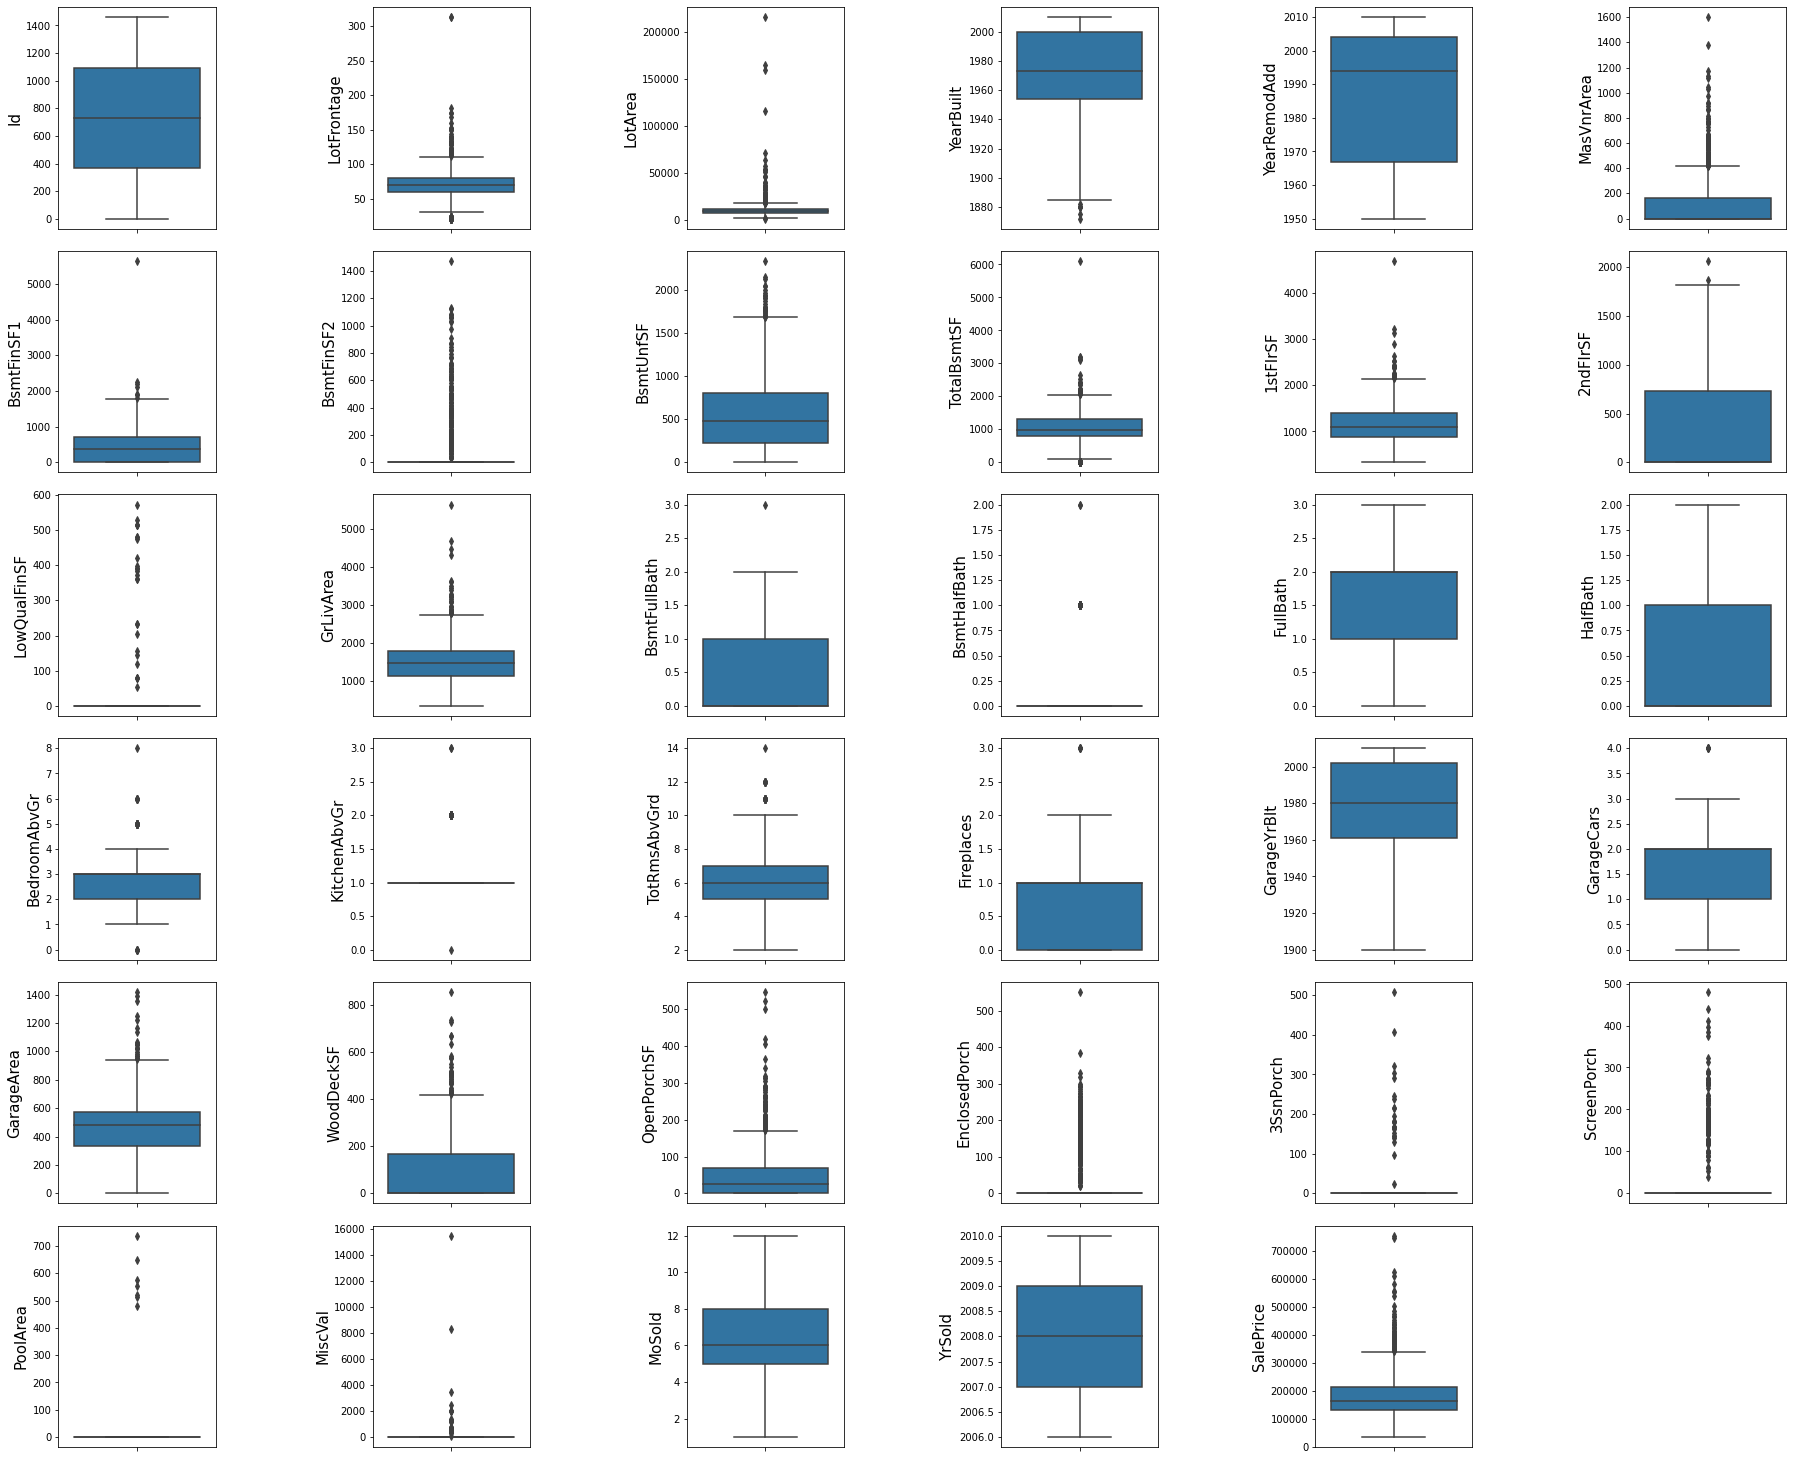

In [1105]:
matplotlib.rc('ytick', labelsize=10) 
font = {'size'   : 15}

matplotlib.rc('font', **font)
def createBoxPlotsForNumericFeatures():
  fig, axes = plt.subplots(math.ceil(len(numerical_cols)/6), 6)
  col=0
  row=0
  for num_col in numerical_cols:
    sns.boxplot(data=house_df, y=num_col, ax=axes[row][col])
    col+=1
    if(col==6):
      col=0
      row+=1
  for col in range(col,6):
    axes[row, col].axis('off')

  plt.subplots_adjust(left=0,
                      bottom=0, 
                      right=4, 
                      top=5, 
                      wspace=1, 
                      hspace=0.1)
  
  plt.show()
createBoxPlotsForNumericFeatures()

### Observations
BsmtFinSF2 - As most of the houses doesn't have type1 basement SQFT so it is zero. So let's keep the data

Similary for below features houses doesn't have these options and so these values are zero. So we can't really delete these.

LowQualFinSF, BsmtHalfBath and EnclosedPorch etc.,

KitchenAbvGr - Most of the houses have one kitchen and some have more. So no need of any cleaning here.

We may need to remove some the outliers based on LotArea and MasVnrArea - during data cleaning.

### Correlation Analysis

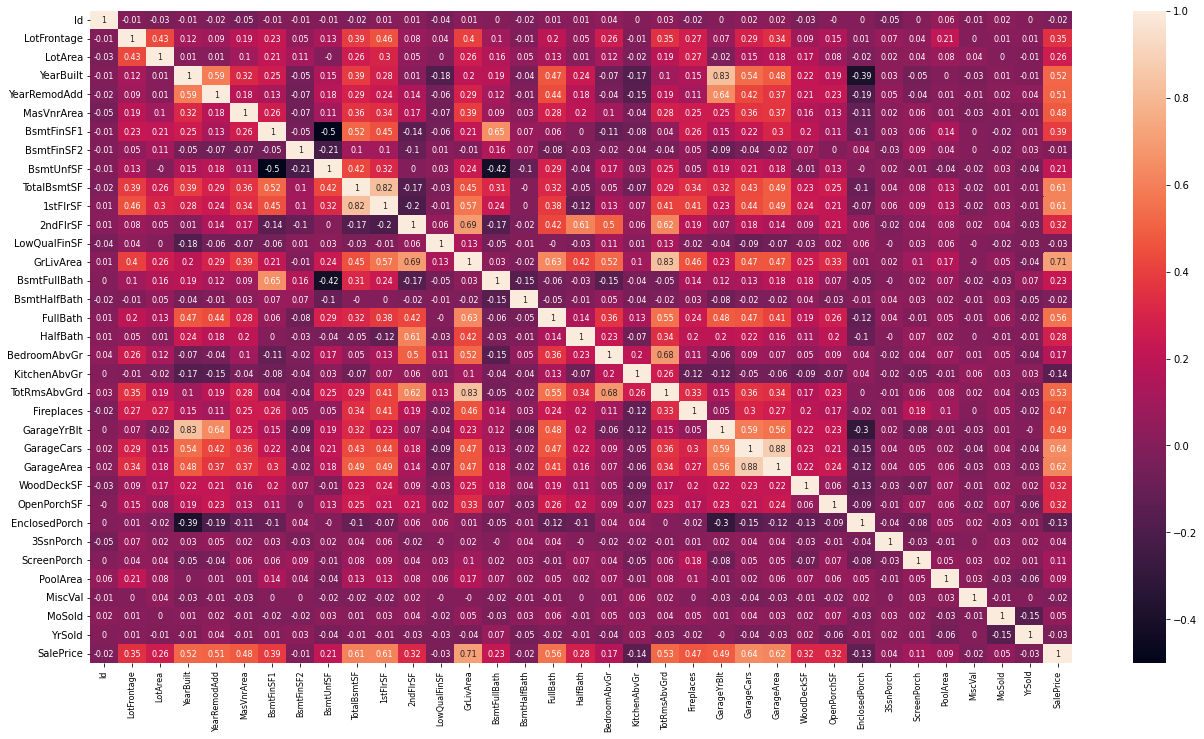

In [1106]:
def plotCorrelationHeatMap():
  font = {'size'   : 8}
  matplotlib.rc('font', **font)
  plt.figure(figsize=(22,12))
  corr = round(house_df[numerical_cols].corr(),2)
  sns.heatmap(corr,annot=True)
  plt.show()
plotCorrelationHeatMap()

### Bi-Variate Analysis with Quantitative features vs Target Variable

<Figure size 1584x864 with 0 Axes>

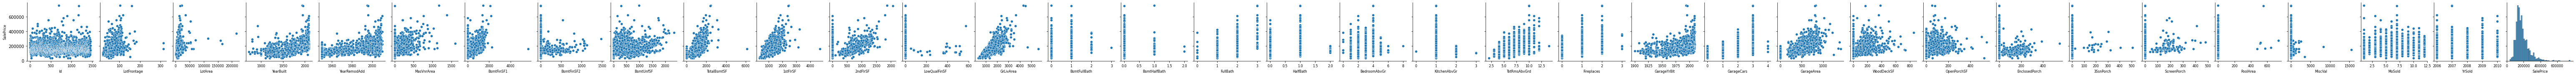

In [1107]:
###Plot Pair plot 
def plotPairPlotForNumericFeatures():
  plt.figure(figsize=(22,12))
  independent_features = list(numerical_cols).remove('SalePrice')
  sns.pairplot(data=house_df[numerical_cols],x_vars=independent_features, y_vars='SalePrice')
  plt.show()
plotPairPlotForNumericFeatures()

### Observations


*   SalesPrice has High positive correlation with Total Basement SquareFeet,Garage cars, 1st Floor SQFT, Garage Area, GrLive Area, LotArea
*   And it has high negative correlation with Age of building and Age of remodel.

* We can also see there is high correlation among the features itself. example Ground Living area has high + correlation with total rooms above ground, 2ndflr sqft, Fullbath, bedrooms above grnd etc



### Bi-Variate Analysis with Categorical features vs Target Variable

In [1108]:
def plotBoxPlotForCategorical():
  def create_hist_plot(x_var,y_var,row,col,title,bins):
    tr1 = go.Box(x=house_df[x_var],y=house_df[y_var])
    tr1.update(name=title)
    fig.add_trace(tr1,row,col)
    fig.update_xaxes(title={
          'text': title},row=row,col=col)

  fig = make_subplots(math.ceil(len(categorical_cols)/6), 6,shared_yaxes=True,vertical_spacing=0.08)

  col=1
  row=1
  for column in categorical_cols:
    create_hist_plot(column,'SalePrice',row,col,column,0)
    col+=1
    if(col==7):
      col=1
      row+=1


  fig.update_layout(width=1500,height=2000,barmode='group', bargap=0.15)
  fig.update_yaxes(title={'text':"House Price"},row=1,col=1)
  fig.show()
plotBoxPlotForCategorical()

### Observations
## Observations

*   OverAllQuality - As rating goes from 1(Bad) to 10 (Excellent) - Price is going higher.

*   ExterQual - Evaluates the quality of the material on the exterior - EX(Excellent) - has higher sale price
*   PoolQC - homes which have excellent Pool higher sale price

*   Similarly in many of Excellent categories we can see sales price is higher


## Step 3: Data Cleaning and Derive New Columns



In [1109]:
# Get columns which have NaN values
house_df[house_df.loc[:,(house_df.isna().sum() > 0)].columns].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [1110]:
# Fill with zero for these columns as there might not be Fence, Lotfrontage etc
house_df[['MasVnrArea','LotFrontage']] = house_df[['MasVnrArea','LotFrontage']].fillna(0)

In [1111]:
# Alley - NaN means No Alley
# PoolQC - NaN means no Pool
# MasVnrType - NaN - is None
# ^Bsmt - NaN - No Basement
# ^Garage - NaN - No Garage
# FireplaceQu - NaN - No Fireplace
house_df['Alley'].fillna('No Alley',inplace=True)
house_df['PoolQC'].fillna('No Pool',inplace=True)
house_df['Fence'].fillna('No Fence',inplace=True)
house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No Basement')
house_df[['GarageType','GarageFinish','GarageQual','GarageCond']] = house_df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
house_df.MasVnrType.fillna('None',inplace=True)
house_df.FireplaceQu.fillna('No Fireplace',inplace=True)

In [1112]:
# As there is no information on Electrical and also one row is NaN. Lets drop that row
house_df.dropna(subset=['Electrical'],axis=0,inplace=True)

In [1113]:
# drop 'MiscFeature' as it has mostly Null values
# drop 'MoSold' as no use and there is Year already
house_df.drop('GarageYrBlt',axis=1,inplace=True)
house_df.drop('MoSold',axis=1,inplace=True)

In [1114]:
# GarageYrBlt - drop this column as well because there are other columns that represents the No Garage and Year built would not be significant as there is year built already
house_df.drop('MiscFeature',axis=1,inplace=True)
house_df.drop('Id',axis=1,inplace=True)

In [1115]:
house_df['age'] = house_df['YrSold'] - house_df['YearBuilt']
house_df['age_remodel'] = house_df['YrSold'] - house_df['YearRemodAdd']

In [1116]:
# Drop the columns 'YearBuilt', 'YrSold' and 'YearRemodAdd'
house_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd'],axis=0,inplace=True)

In [1117]:
# As per above EDA, LotArea has some outliers and so let's remove it using IQR range
Q1 = house_df.LotArea.quantile(0.1)
Q3 = house_df.LotArea.quantile(0.9)
IQR = Q3-Q1
house_df = house_df[(house_df['LotArea'] <= (Q3 + 1.5*IQR))&(house_df['LotArea'] >= (Q1 - 1.5*IQR))]

# Remove MasVnrArea outliers

Q1 = house_df.MasVnrArea.quantile(0.1)
Q3 = house_df.MasVnrArea.quantile(0.9)
IQR = Q3-Q1
house_df = house_df[(house_df['MasVnrArea'] <= (Q3 + 1.5*IQR))&(house_df['MasVnrArea'] >= (Q1 - 1.5*IQR))]



In [1118]:
house_df.shape

(1422, 76)

## Step 3: Data Preparation



In [1119]:
#object_cols = house_df.select_dtypes(include=['object']).columns
#house_df[object_cols] = house_df[object_cols].astype('category')
numerical_cols,categorical_cols = getNumericAndCategorical()
#house_df[categorical_cols] = house_df[categorical_cols] .astype('str')

In [1120]:
# Split train and test data
np.random.seed(1)
house_train_df, house_test_df = train_test_split(house_df,train_size=0.7, test_size=0.3, random_state=100)

In [1121]:
house_df[numerical_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,age,age_remodel
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,6
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,36
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8


In [1122]:
house_df[categorical_cols].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,WD,Normal


#### Data Pre-Processing
1) Let's scale the continuous numerical variables using MinMaxScalar - scaling helps to converge the faster and also will not lead to mis-interpretations due to high magnitudes.

2) Use one-hot encode for categorical features.

We are using here ColumnTransformer pipeline to do this.

In [1123]:
preprocess_pipeline = ColumnTransformer([
                                         ('numericaltransformer',MinMaxScaler(),numerical_cols),
                                         ('categorical',OneHotEncoder(drop='first',dtype=np.int64,sparse=True,handle_unknown='ignore'),categorical_cols)

                                         
],remainder='passthrough')
house_train_ndarray = preprocess_pipeline.fit_transform(house_train_df)

In [1124]:
house_train_df = pd.DataFrame.sparse.from_spmatrix(house_train_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [1125]:
house_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Columns: 268 entries, numericaltransformer__LotFrontage to categorical__SaleCondition_Partial
dtypes: Sparse[float64, 0](268)
memory usage: 665.6 KB


## Step 4: Model Building and Evaluation


Ridge Regression

In [1126]:
X_cols = list(house_train_df.columns)

In [1127]:
print(len(X_cols))

268


In [1128]:
print(X_cols.remove('numericaltransformer__SalePrice'))

None


In [1129]:
print(len(X_cols))

267


In [1130]:
#Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=1)

#Set Hyper parameters for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

ridge_model = GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True)
y_train = house_train_df['numericaltransformer__SalePrice']
X_train = house_train_df[X_cols]

ridge_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2')

In [1131]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 3.0}
0.9020342229247322


In [1132]:
house_test_ndarray = preprocess_pipeline.transform(house_test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning:

Found unknown categories in columns [11, 17, 18, 19, 30, 34, 39, 41] during transform. These unknown categories will be encoded as all zeros



In [1133]:
house_test_df = pd.DataFrame.sparse.from_spmatrix(house_test_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [1134]:
y_test = house_test_df['numericaltransformer__SalePrice']
X_test = house_test_df[X_cols]

In [1135]:
y_pred = ridge_model.predict(X_test)

In [1136]:
r2_score(y_test, y_pred)

0.8871177315178285